# MNSİT - 60.000 Adet 28x28 piksel şeklinde
### from keras.layers import Dense, Flatten
* Dense: Tam bağlı bir YSA katmanıdır girdilerin içerisindeki karmaşık ilişkileri öğrenmek için vardır.
* Flatten: Çok boyutlu veri yapılarını tek boyutlu bir vektöre indirgeme işlemini yapıyor. Sonra bu diziyi Dense katmanına girdi olarak verebilir.

### from keras.models import Sequential
* Katmanları sırayla üst üste ekleyerek bir sinir ağı modeli oluşturmak için kullanılır. Basit ve doğrusal bir model yapısı oluşturmak için idealdir. Bu model, katmanları sıralı bir şekilde birbirine bağlayarak bir yapay sinir ağı meydana getirir.

### from tensorflow.keras.utils import to_categorical
*  Sınıf etiketlerini one-hot encoding formatına dönüştürmek için kullanılır. Örneğin, 0-9 arasındaki rakam etiketleri, 10 elemanlı bir vektöre dönüştürülür. y_train etiketlerinin [5] gibi tek bir sayı yerine [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] şeklinde bir vektör haline getirilmesi, modelin sınıflandırma problemini daha etkin bir şekilde çözmesine yardımcı olur.

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [13]:
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)

temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

print("New y_test: \n ", y_test, "\n \n \n")
print("New y_train: \n ", y_train, "\n \n \n")

New y_test: 
  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 
 

New y_train: 
  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]] 
 
 



In [14]:
model = Sequential()
#Sequential(): Katmanların sırasıyla ekleneceği boş bir model oluşturulur. katmanları doğrusal bir akışta düzenler 

model.add(Flatten(input_shape = (28,28)))
# input_shape = (28,28): Giriş verisinin 28x28 boyutunda geleceğini söylüyor 
# Flatten: Flatten yardımıyla 28x28 boyutundaki veri tek boyuta indirgeniyor
# model.add: Bu fonksiyon ilede oluşturduğumuz(Sequential ile) boş ortama bu katmanı dahil ediyoruz

model.add(Dense(units=128, activation='tanh'))
# Dense: Yani gizili katman oluşturuyoruz ardından oluşturduğumuz katmana 128 adet nöron yerleştiriyoruz ve 
# bu nöronların herbirinde tanh aktivasyon fonksiyonu çalışıyor. Son olarakta model.add ile Sequential boş ortamımıza ekleme yapıyoruz 

model.add(Dense(units=64, activation='tanh'))
# Dense: Yani gizili katman oluşturuyoruz ardından oluşturduğumuz katmana 64 adet nöron yerleştiriyoruz ve 
# bu nöronların herbirinde tanh aktivasyon fonksiyonu çalışıyor. Son olarakta model.add ile Sequential boş ortamımıza ekleme yapıyoruz 

model.add(Dense(units=10, activation='softmax'))
# Modelin son çıkış katmanı olarak 10 adet çıktı almak istediğimiz için sonuç olarak 0 dan 9 a kadar 10 adet rakam mevcut son çıkış katmanını oluşturduk
# Bu katmanda ise softmax kullandık çünkü gelen değerleri son bir kez düzenleyip öyle bir çıktı almak istiyorum.

model.summary()
# bu yere kadar oluşturduğumuz YSA modelinin özet tanlo şekilinde ekranda görmemize yarıyor.

C:\Users\Mehmet Ersolak\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss = 'categorical_crossentropy',  
              optimizer='adam', 
              metrics=['accuracy'])

callbacks = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10, 
                          verbose = 1)

Epoch 1/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8061 - loss: 0.6065 - val_accuracy: 0.8595 - val_loss: 0.4499
Epoch 2/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8621 - loss: 0.4322 - val_accuracy: 0.8897 - val_loss: 0.3605
Epoch 3/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8836 - loss: 0.3629 - val_accuracy: 0.8908 - val_loss: 0.3395
Epoch 4/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8941 - loss: 0.3338 - val_accuracy: 0.8973 - val_loss: 0.3290
Epoch 5/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9015 - loss: 0.3142 - val_accuracy: 0.9055 - val_loss: 0.2934
Epoch 6/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9085 - loss: 0.2896 - val_accuracy: 0.9056 - val_loss: 0.2951
Epoch 7/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9095 - loss: 0.2860 - val_accuracy: 0.9082 - val_loss: 0.2898
Epoch 8/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9138 - loss: 0.271

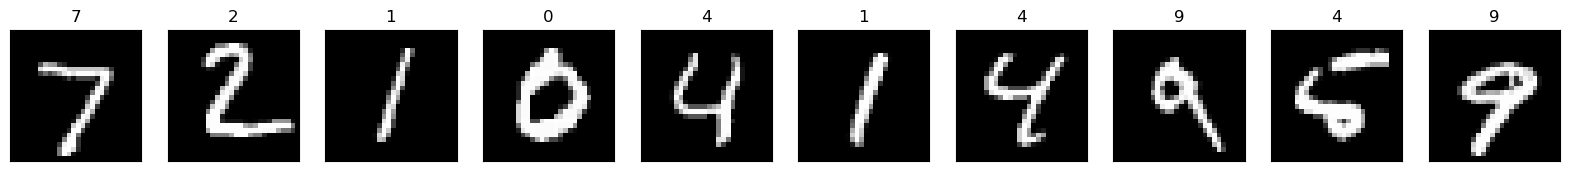

In [16]:
history = model.fit(X_train, 
          y_train, 
          batch_size=10, 
          epochs=50, 
          validation_data=(X_test, y_test),
          callbacks=callbacks)



train_predict = model.predict(X_train)
train_predict = np.argmax(train_predict, axis=1)

test_predict = model.predict(X_test)
test_predict = np.argmax(test_predict, axis=1)

fig, axes = plt.subplots(ncols = 10, sharex = False, sharey = True, figsize = (20,4))
# Matplotlib kullanarak bir görselleştirme alanı oluşturur. Burada 10 adet alt grafikten oluşan bir figür (fig) ve eksenler dizisi (axes) tanımlanır. 
# Bu, 10 farklı resim ve tahminini tek bir satırda göstermek için idealdir.
for i in range(10):
    axes[i].set_title(test_predict[i])
    axes[i].imshow(X_test[i], cmap = 'gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

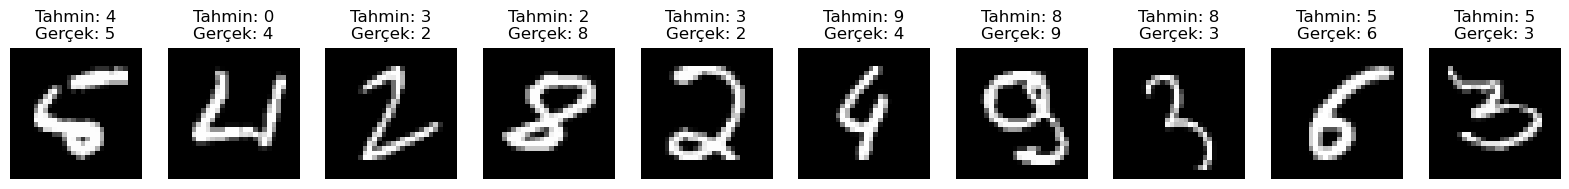

In [19]:
# y_test elemanlarını (one-hot) formatından gerçeksayıya dönüşütürüp y_test_label değişkenine atılıyor
y_test_label = np.argmax(y_test, axis = 1)

wrong_predict = np.where(y_test_label != test_predict)[0]

display_count = 10
wrong_indices = wrong_predict[:display_count]

fig, axes = plt.subplots(ncols=display_count, nrows=1, sharex=False, sharey=True, figsize=(20, 4))
for i in range(display_count):
    index = wrong_indices[i]
    axes[i].set_title(f'Tahmin: {test_predict[index]}\nGerçek: {y_test_label[index]}')
    axes[i].imshow(X_test[index], cmap='gray')
    axes[i].axis('off')

plt.show()

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9425 - loss: 0.1851 - val_accuracy: 0.9398 - val_loss: 0.1924
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9445 - loss: 0.1800 - val_accuracy: 0.9436 - val_loss: 0.1939
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9436 - loss: 0.1815 - val_accuracy: 0.9415 - val_loss: 0.1936
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9407 - loss: 0.1922 - val_accuracy: 0.9413 - val_loss: 0.1984
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9391 - loss: 0.1927 - val_accuracy: 0.9379 - val_loss: 0.2081
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9385 - loss: 0.1940 - val_accuracy: 0.9373 - val_loss: 0.2059
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9423 - loss: 0.1850 - val_accuracy: 0.9409 - val_loss: 0.1976
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9424 - loss: 0.1856 - 

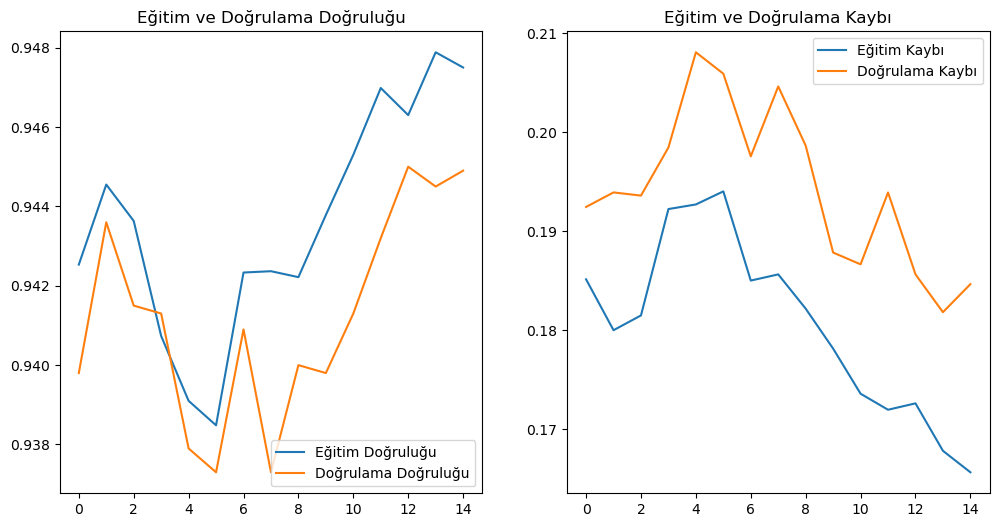

In [21]:
history = model.fit(X_train, y_train, epochs= 15 ,validation_data=(X_test, y_test))

# Grafik için verileri alma
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(15)

# Doğruluk (Accuracy) grafiği
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Doğruluğu')

# Kayıp (Loss) grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.show()